In [1]:
# !pip install gymnasium

GIF saved as frozenlake.gif


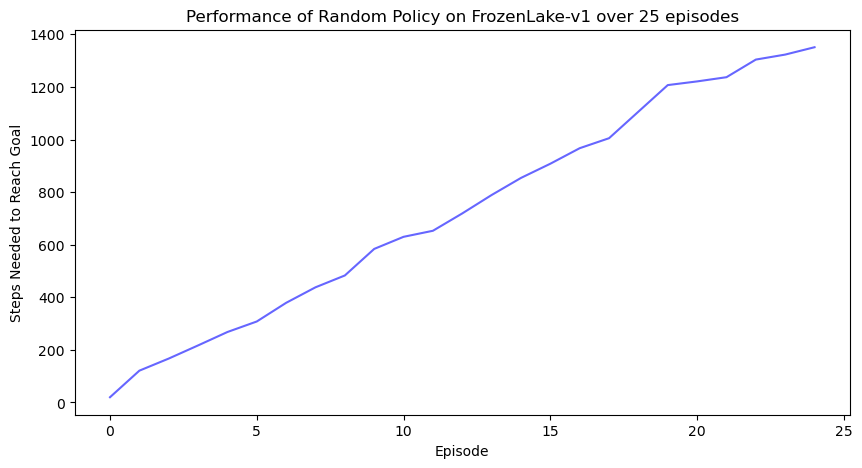

In [1]:
import gymnasium as gym
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import imageio
import matplotlib.pyplot as plt
import re

desc=["SFFF", "FFFF", "FFFF", "FFFG"]
# Initialize the FrozenLake environment
env = gym.make('FrozenLake-v1', desc=desc, is_slippery=False, render_mode='rgb_array')

def render_to_image(env):
    """Convert the text-based rendering to an image."""
    img = env.render()
    return img

def evaluate_and_save_gif(num_episodes=25, filename="frozenlake.gif"):
    """
    Evaluate a random policy, save the rendered outputs to a GIF, and return aggregated rewards.
    """
    frames = []
    rewards = []
    stepCount=[]

    for episode in range(num_episodes):
        state = env.reset()
        episode_reward = 0
        done = False

        # Add initial state to frames
        frames.append(render_to_image(env))
        count=0
        while not done:
            # Choose a random action
            action = env.action_space.sample()

            # Take a step in the environment
            next_state, reward, done, _, info = env.step(action)
            episode_reward += reward

            # Add the new state to frames
            frames.append(render_to_image(env))
            count+=1
            if count>100:
                done = True
                episode_reward-=1
        rewards.append(episode_reward)
        stepCount.append(count)

    # Save frames as a gif
    imageio.mimsave(filename, [np.array(f) for f in frames], duration=0.5)
    print(f"GIF saved as {filename}")

    return rewards, stepCount

# Evaluate the random policy, save the GIF, and retrieve rewards
num_episodes = 25
rewards, steps = evaluate_and_save_gif(num_episodes=num_episodes, filename="frozenlake.gif")

# Calculate cumulative rewards
cumulative_steps = np.cumsum(steps)

# Plotting the aggregated rewards
plt.figure(figsize=(10, 5))
plt.plot(np.arange(num_episodes),cumulative_steps , alpha=0.6, color='blue')
plt.xlabel('Episode')
plt.ylabel('Steps Needed to Reach Goal')
plt.title('Performance of Random Policy on FrozenLake-v1 over {} episodes'.format(num_episodes))
plt.show()


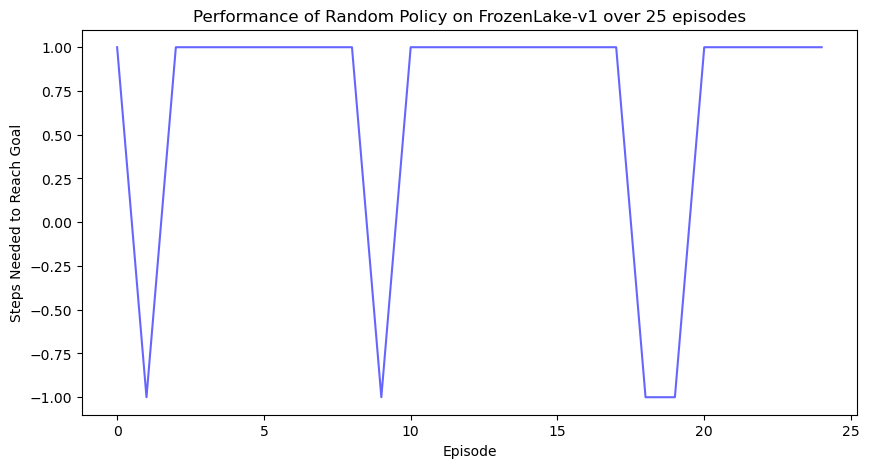

In [2]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(num_episodes),rewards , alpha=0.6, color='blue')
plt.xlabel('Episode')
plt.ylabel('Steps Needed to Reach Goal')
plt.title('Performance of Random Policy on FrozenLake-v1 over {} episodes'.format(num_episodes))
plt.show()

In [3]:
import os
import openai
from tqdm import tqdm

openai.api_base = "http://localhost:1234/v1"
openai.api_key = ""

In [4]:
goal_state = (3,3)
global system_prompt
global user_prompt
system_prompt = "I am a navigator bot provide context of how you want to control navigation. I output directions, Top, Bottom, Right and Left"

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

state:0
coordinate:(1, 1)
0
Input:(1, 1)
 To reach the point (4, 4) from your current position of (1, 1), you need to move in a diagonal direction. Specifically, you need to move 3 units to the right and then 3 units upwards.

Therefore, the correct answer is D) Right.
state:1
coordinate:(2, 1)
1
Input:(2, 1)
 To reach the destination point of (4,4) from your current point of (2,1), you need to move in a direction that is 2 units to the right and 3 units up.
The options given are not enough to describe the direction required. However, based on the information provided, the direction you would need to move in to reach (4,4) would be Up and Right. So the answer would be C) Left.
state:2
coordinate:(3, 1)
2
Input:(3, 1)
 To reach the position (4,4) from your current position (3,1), you need to move in a diagonal direction. The best option would be D) Right.
state:3
coordinate:(4, 1)
3
Input:(4, 1)
 In order to reach (4,4) from your current position of (4,1), you need to move down. Therefo

 33%|███████████████████████████▋                                                       | 1/3 [06:06<12:13, 366.66s/it]

 To reach the position (4, 4) from your current position (4, 3), you need to move one unit upward, which would be in the direction of "Up". Therefore, the correct answer is A) Up.
state:15
coordinate:(4, 4)
state:0
coordinate:(1, 1)
0
Input:(1, 1)
 You need to move in the direction of the right arrow (D).
state:0
coordinate:(1, 1)
0
Input:(1, 1)
 To move from the position (1, 1) to the position (4, 4), you can take the following steps:

1. Move two units to the right (eastward) by moving from the current position (1, 1) to (3, 1).
2. Move one unit up by moving from the position (3, 1) to (3, 2).
3. Move one unit to the left (westward) by moving from the position (3, 2) to (2, 2).
4. Move one unit down by moving from the position (2, 2) to (2, 1).
5. Move two units to the right (eastward) by moving from the position (2, 1) to (4, 1).
6. Move one unit up by moving from the position (4, 1) to (4, 2).
7. Move one unit to the left (westward) by moving from the position (4, 2) to (3, 2).
8. 

 67%|███████████████████████████████████████████████████████▎                           | 2/3 [11:19<05:34, 334.94s/it]

 To reach the point (4, 4) from the current position of (4, 3), you need to move up one unit. Therefore, the correct option is **A) Up**.
state:15
coordinate:(4, 4)
state:0
coordinate:(1, 1)
0
Input:(1, 1)
 You need to move to the right (D) in order to reach the coordinates (4,4) from the current position of (1, 1).
state:0
coordinate:(1, 1)
0
Input:(1, 1)
 To reach the target position (4,4) from your current position (1,1), you need to move up and left. Therefore, the answer is:

A) Up and D) Left.
state:0
coordinate:(1, 1)
0
Input:(1, 1)
 To get from the current position (1, 1) to the target position (4, 4), you need to move in a straight line in the direction of the target point. If you move one unit to the right and two units up, you will reach the desired position. So, the answer is C) Right.
state:1
coordinate:(2, 1)
1
Input:(2, 1)
 You need to move in the "Right" direction to reach the destination at (4,4).
state:2
coordinate:(3, 1)
2
Input:(3, 1)
 To move from (3, 1) to (4, 4),

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [14:24<00:00, 288.14s/it]

 To reach the destination at (4, 4) from the current position of (4, 3), you need to move in the upwards direction. The answer is option B) Up.
state:15
coordinate:(4, 4)


GIF saved as frozenlakellm.gif


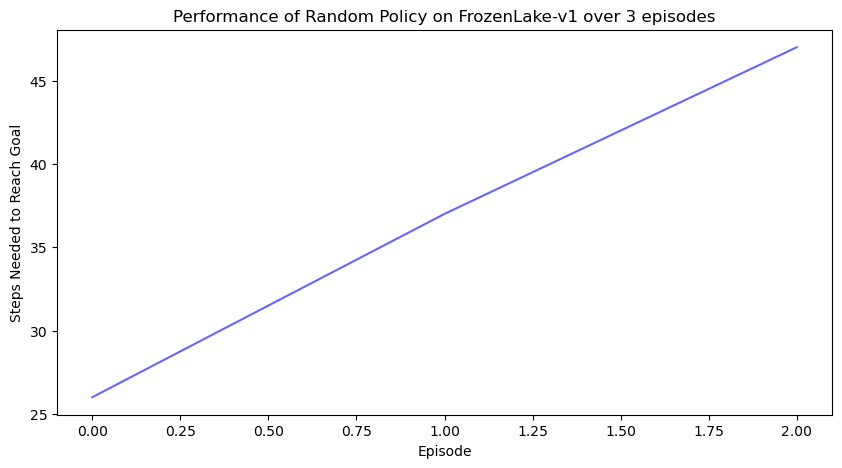

In [10]:
global history
history = []

desc=["SFFF", "FFFF", "FFFF", "FFFG"]
# Initialize the FrozenLake environment
env = gym.make('FrozenLake-v1', desc=desc, is_slippery=False, render_mode='rgb_array')

def state_to_coordinate(state, nrows=4):
    """
    Convert a state represented by an integer into coordinates (row, column),
    for a coordinate system where the origin is (1,1).

    Parameters:
    state (int): The state integer.
    nrows (int): The number of rows in the grid.

    Returns:
    tuple: A tuple representing the coordinates (row, column), adjusted for the new origin.
    """
    row = state // nrows
    col = state % nrows
    return (col + 1, row + 1)

def env_to_eng(x):
    return state_to_coordinate(x)


def render_to_image(env):
    """Convert the text-based rendering to an image."""
    img = env.render()
    return img

def extract_decision_llama2(text):
    right_search = re.search(r"\bRight\b", text)
    left_search = re.search(r"\bLeft\b", text)
    up_search = re.search(r"\bUp\b", text)
    down_search = re.search(r"\bDown\b", text)
    
    if right_search:
        return 2
    elif left_search:
        return 0
    elif up_search:
        return 1
    elif down_search:
        return 3
    else:
        return 0

def action_generator(hist,env_state,flag=False):
    x = env_to_eng(env_state)
    print(f'Input:{x}')    
    user_message = {"role":"user","content":f"Your current position: {x}, you have to reach (4,4). Answer which direction you move in. Options A) Up B) Down C) Left D) Right"}
    # hist.append(user_message)
    completion = openai.ChatCompletion.create(
    model="local-model", 
    messages=[user_message]
    )
    response = completion.choices[0].message['content']
    print(response)
    # post process action here
    # hist.append({"role":"system","content":response})
    
    action = extract_decision_llama2(response)
    
    #print(f'\nReasoning:{response}')
    return action

def evaluate_llm_and_save_gif(num_episodes=100, filename="frozenlake.gif"):
    """
    Evaluate a random policy, save the rendered outputs to a GIF, and return aggregated rewards.
    """
    frames = []
    rewards = []
    stepCount = []

    for episode in tqdm(range(num_episodes)):
        state = env.reset()[0]
        print("state:" + str(state))
        print("coordinate:" + str(env_to_eng(state)))
        episode_reward = 0
        done = False
        

        # Add initial state to frames
        frames.append(render_to_image(env))
        count=0
        while not done:
            # Choose a random action
            print(state)
            global history
            action = action_generator(history,state,True)

            # Take a step in the environment
            state, reward, done, _, info = env.step(action)
            print("state:" + str(state))
            print("coordinate:" + str(env_to_eng(state)))  
            episode_reward += reward
                  

            # Add the new state to frames
            frames.append(render_to_image(env))
            count+=1
            if count>30:
                done = True
                  
        rewards.append(episode_reward)
        stepCount.append(count)
        history = []

    # Save frames as a gif
    imageio.mimsave(filename, [np.array(f) for f in frames], duration=0.5)
    print(f"GIF saved as {filename}")

    return rewards, stepCount

# Evaluate the random policy, save the GIF, and retrieve rewards
num_episodes = 3
rewards, steps = evaluate_llm_and_save_gif(num_episodes=num_episodes, filename="frozenlakellm.gif")

# Calculate cumulative rewards
cumulative_steps = np.cumsum(steps)

# Plotting the aggregated rewards
plt.figure(figsize=(10, 5))
plt.plot(np.arange(num_episodes),cumulative_steps , alpha=0.6, color='blue')
plt.xlabel('Episode')
plt.ylabel('Steps Needed to Reach Goal')
plt.title('Performance of Random Policy on FrozenLake-v1 over {} episodes'.format(num_episodes))
plt.show()


In [9]:
# Calculate cumulative rewards
rewards

[1.0, 1.0, 1.0]

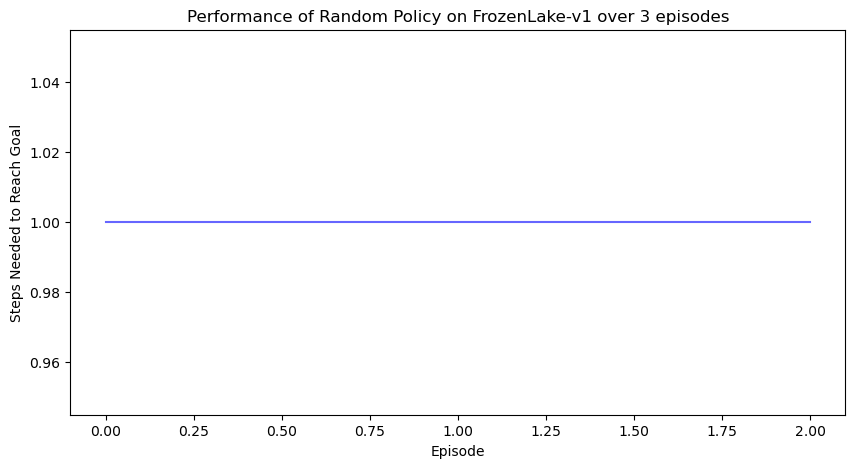

In [11]:
# Plotting the aggregated rewards
plt.figure(figsize=(10, 5))
plt.plot(np.arange(num_episodes),rewards , alpha=0.6, color='blue')
plt.xlabel('Episode')
plt.ylabel('Steps Needed to Reach Goal')
plt.title('Performance of Random Policy on FrozenLake-v1 over {} episodes'.format(num_episodes))
plt.show()

In [ ]:
env.reset()

In [ ]:
env.step(1)

In [ ]:
state_to_coordinate(5)

In [ ]:
def state_to_coordinate(state, nrows=4):
    """
    Convert a state represented by an integer into coordinates (row, column),
    for a coordinate system where the origin is (1,1).

    Parameters:
    state (int): The state integer.
    nrows (int): The number of rows in the grid.

    Returns:
    tuple: A tuple representing the coordinates (row, column), adjusted for the new origin.
    """
    row = state // nrows
    col = state % nrows
    return (col + 1, row + 1)

# Example usage:
state = 15
nrows = 4
coordinates = state_to_coordinate(state, nrows)
print(f"The coordinates for state {state} on a {nrows}x{nrows} grid are: {coordinates}")
